# 🧪 Enhanced Student Exam Pass Prediction (Logistic Regression)

This notebook predicts whether a student will pass or fail an exam based on the number of hours they studied and other factors, using Logistic Regression with additional features and evaluation techniques.

In [ ]:
# 📦 Install Required Libraries (if needed)
# !pip install pandas scikit-learn matplotlib seaborn

In [1]:
# 📊 Step 1: Create Enhanced Dataset
import pandas as pd

data = {
    'Hours_Studied':         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Sleep_Hours':           [6, 6.5, 7, 5, 6, 7, 8, 8.5, 7, 9],
    'Attendance_Percentage': [40, 45, 50, 55, 60, 75, 80, 85, 90, 95],
    'Passed':                [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
df

,Hours_Studied,Sleep_Hours,Attendance_Percentage,Passed
0,1,6.0,40,0
1,2,6.5,45,0
2,3,7.0,50,0
3,4,5.0,55,0
4,5,6.0,60,1
5,6,7.0,75,1
6,7,8.0,80,1
7,8,8.5,85,1
8,9,7.0,90,1
9,10,9.0,95,1


In [3]:
# 🔧 Step 2: Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df[['Hours_Studied', 'Sleep_Hours', 'Attendance_Percentage']]
y = df['Passed']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 🤖 Step 3: Train-Test Split and Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



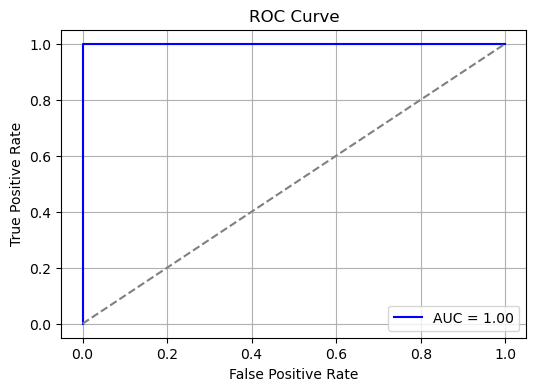

In [9]:
# 📈 Step 4: ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 🔍 Step 5: Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Cross-validation scores: [0.5 1.  1.  1.  1. ]
Average CV score: 0.9


/home/abdul/Softwares/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
